Deberás trabajar con un conjunto de datos ficticio para calcular estadísticas descriptivas clave y visualizar la distribución de los datos. Se utilizarán herramientas como Pandas, NumPy y Matplotlib para realizar el análisis.
Requerimientos:
1. Definir Variables (2 puntos)
● Identificar el tipo de variable (categórica, cuantitativa discreta o continua) de cada
columna en el conjunto de datos.
2. Construcción de una Tabla de Frecuencia (2 puntos)
● Generar una tabla de frecuencia para una variable categórica y otra para una variable cuantitativa discreta.
3. Cálculo de Medidas de Tendencia Central (2 puntos)
● Calcular la media, mediana y moda de una variable cuantitativa.
4. Cálculo de Medidas de Dispersión (2 puntos)
● Calcular el rango, varianza y desviación estándar de la misma variable utilizada en el
punto anterior.
5. Visualización de Datos (2 puntos)
Crear un histograma para una variable cuantitativa y un boxplot para otra variable del dataset.

# **Importar Librerias**

In [22]:
import pandas as pd
import csv
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
files.upload()
archivo_csv = 'ingresos.csv'

#Carga Dataset(defino el separador, para asegurarme de poder leerlo correctamente)
with open(archivo_csv, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)

df_ingresos = pd.read_csv(archivo_csv, sep=dialect.delimiter)
print(df_ingresos.sort_values(by='Edad'))


Saving ingresos.csv to ingresos.csv
   ID  Nombre  Edad  Ingresos     Género        Ciudad
3   4   Marta    22      2200   Femenino         Quito
7   8   Elena    24      2700   Femenino         Quito
0   1     Ana    25      2500   Femenino          Lima
9  10   Paula    26      2600   Femenino  Buenos Aires
5   6   Sofía    27      2900   Femenino          Lima
2   3    Luis    28      2800  Masculino          Lima
6   7  Carlos    29      3100  Masculino  Buenos Aires
1   2    Juan    30      3200  Masculino        Bogotá
8   9  Miguel    31      3300  Masculino      Santiago
4   5   Pedro    35      4100  Masculino      Santiago


**1.- Tipos**
* Nombre -> Categorica
* Edad -> Discreta
* Ingresos ->  Discreta
* Gënero -> Categorica
* Ciudad -> Categorica


**2.- Tabla de Frecuencia**

* Edad -> Discreta
* Gënero -> Categorica

In [6]:
lista = ['Género', 'Edad']
tabla_frecuencia = {}
for columna in lista:
    print("\n\033[4mFrecuencias",columna.capitalize(),":\033[0m")
    tabla_frecuencia[columna] = df_ingresos[columna].value_counts().sort_index().to_frame('Absoluta')
    tabla_frecuencia[columna]['Relativa'] = tabla_frecuencia[columna]['Absoluta']/tabla_frecuencia[columna]['Absoluta'].sum()
    tabla_frecuencia[columna]['Acumulada'] = tabla_frecuencia[columna]['Absoluta'].cumsum()
    tabla_frecuencia[columna]['Relativa Acumulada'] = tabla_frecuencia[columna]['Relativa'].cumsum()

    print(tabla_frecuencia[columna])




Frecuencias Género :
           Absoluta  Relativa  Acumulada  Relativa Acumulada
Género                                                      
Femenino          5       0.5          5                 0.5
Masculino         5       0.5         10                 1.0

Frecuencias Edad :
      Absoluta  Relativa  Acumulada  Relativa Acumulada
Edad                                                   
22           1       0.1          1                 0.1
24           1       0.1          2                 0.2
25           1       0.1          3                 0.3
26           1       0.1          4                 0.4
27           1       0.1          5                 0.5
28           1       0.1          6                 0.6
29           1       0.1          7                 0.7
30           1       0.1          8                 0.8
31           1       0.1          9                 0.9
35           1       0.1         10                 1.0


**3.- y 4.- Analisis variables cuantitativas**

**Medidas de Tendencia central (media, mediana y moda)**

**Medidas de Variacion (rango, varianza y desviación estándar)**


* Edad -> Discreta


In [25]:
vCuantitativas = ['Edad']
media = {}
mediana = {}
moda = {}
rango = {}
varianza = {}
desviacion_estandar = {}
for columna in vCuantitativas:
  media[columna] = df_ingresos[columna].mean()
  mediana[columna]  = df_ingresos[columna].median()
  moda[columna]  = df_ingresos[columna].mode()[0]
  rango[columna] = df_ingresos[columna].max() - df_ingresos[columna].min()
  varianza[columna] = df_ingresos[columna].var()
  desviacion_estandar[columna] = df_ingresos[columna].std()
  coeficiente_variacion = (desviacion_estandar[columna] / media[columna])*100

  print("\n\033[4mValores Variable Cuanitativa",columna.capitalize(),":\033[0m")
  print("Media:",f"{media[columna]: .2f}")
  print("Mediana:",f"{mediana[columna]: .2f}")
  print("Moda:",moda[columna])
  print("Rango:",rango[columna])
  print("Varianza:",f"{varianza[columna]: .2f}")
  print("Desviacion Estandar:",f"{desviacion_estandar[columna]: .2f}")
  print("Coeficiente de variacion: ", f"{coeficiente_variacion: .2f}%")


Valores Variable Cuanitativa Edad :
Media:  27.70
Mediana:  27.50
Moda: 22
Rango: 13
Varianza:  14.23
Desviacion Estandar:  3.77
Coeficiente de variacion:   13.62%


**5.- Histograma**

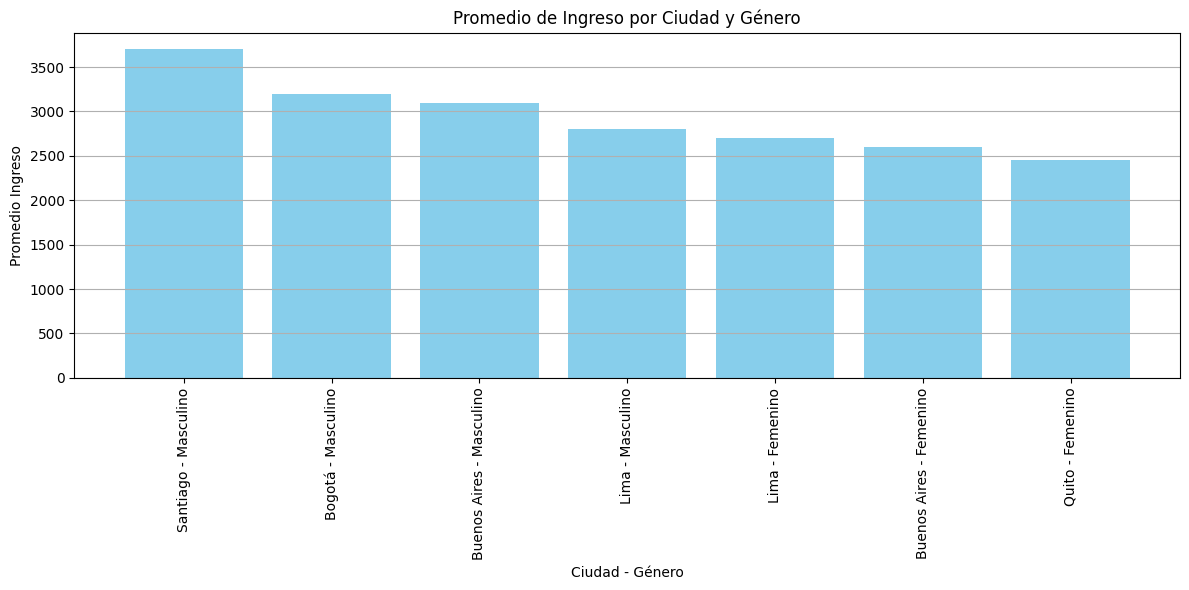

In [ ]:

rango_ingreso = df_ingresos.groupby(['Ciudad', 'Género']).agg(
    promedio=('Ingresos', 'mean')
)
    

# Crear columna combinada para eje X
rango_ingreso['Ciudad_Genero'] = rango_ingreso.index.get_level_values('Ciudad') + ' - ' + rango_ingreso.index.get_level_values('Género')

# Ordenar por precio mediano (Q2),
rango_ordenado = rango_ingreso.sort_values(by='promedio', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
plt.bar(rango_ordenado['Ciudad_Genero'], rango_ordenado['promedio'], color='skyblue')

plt.xticks(rotation=90)
plt.title('Promedio de Ingreso por Ciudad y Género')
plt.xlabel('Ciudad - Género')
plt.ylabel('Promedio Ingreso')
plt.tight_layout()
plt.grid(axis='y')
plt.show()



**5.- Boxplot**

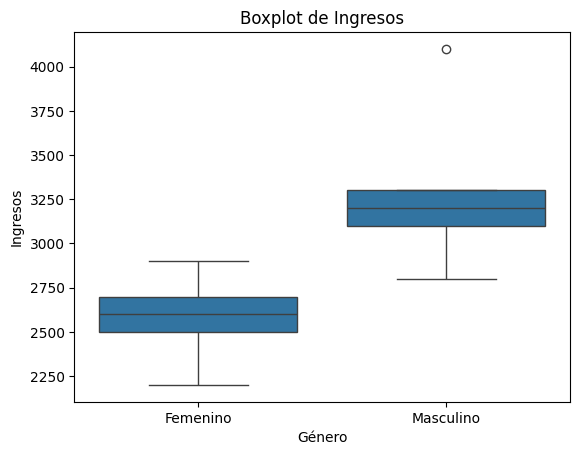

In [ ]:
#hacer diagrama de cajas
import matplotlib.pyplot as plt

sns.boxplot(x='Género', y='Ingresos', data=df_ingresos)
plt.title('Boxplot de Ingresos')
plt.show()